In [14]:
# Import des bibliotèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
# Chargement des données
mall_data = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Mall_Customers.csv')

In [16]:
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
# Validation du chargement de la dataset
mall_data.shape

(200, 5)

In [18]:
# Stats descriptive
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### Statistiques descriptives des variables numériques
Voir tatbleau des stats ci-dessus
##### Valeurs nulles :
Il n'y a pas valeurs manquantes

In [19]:
# 
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
# Renommage des colonnes
new_mall_data = mall_data.rename(columns={
    'Annual Income (k$)' : 'AnnualIncome',
    'Spending Score (1-100)' : 'SpendingScore'
})

In [21]:
new_mall_data.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

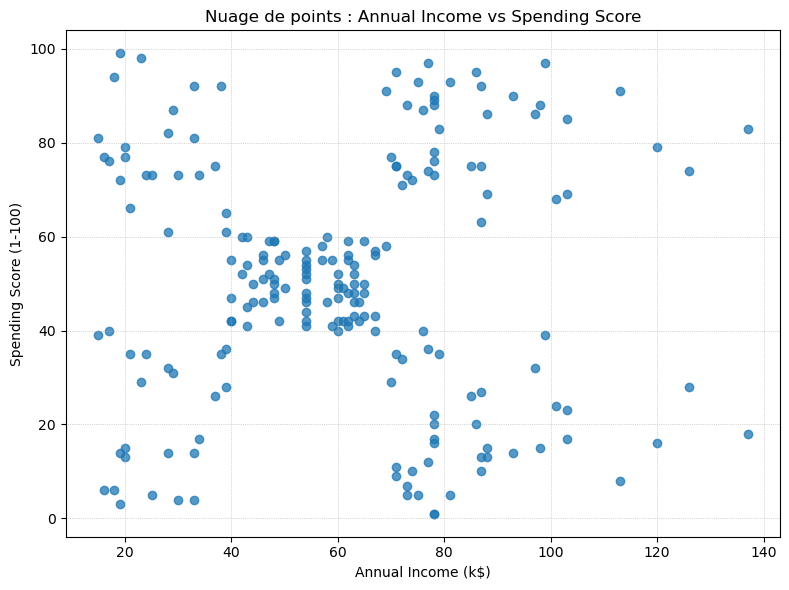

In [22]:
# Première visualisation du couple (AnnualIncome, SpendingScore) - nuage de points
plt.figure(figsize=(8,6))
plt.scatter(new_mall_data['AnnualIncome'], new_mall_data['SpendingScore'], alpha=0.75)
plt.title('Nuage de points : Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show

In [23]:
# Matrice de caractéristiques X à partir des colonnes AnnualIncome et SpendingScore
X = new_mall_data.loc[:,["AnnualIncome","SpendingScore"]].values

In [24]:
# Détermination du nombre optimal de clusters
# Méthode du coude (Elbow Method)
# Liste pour stocker les inerties
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="random", random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

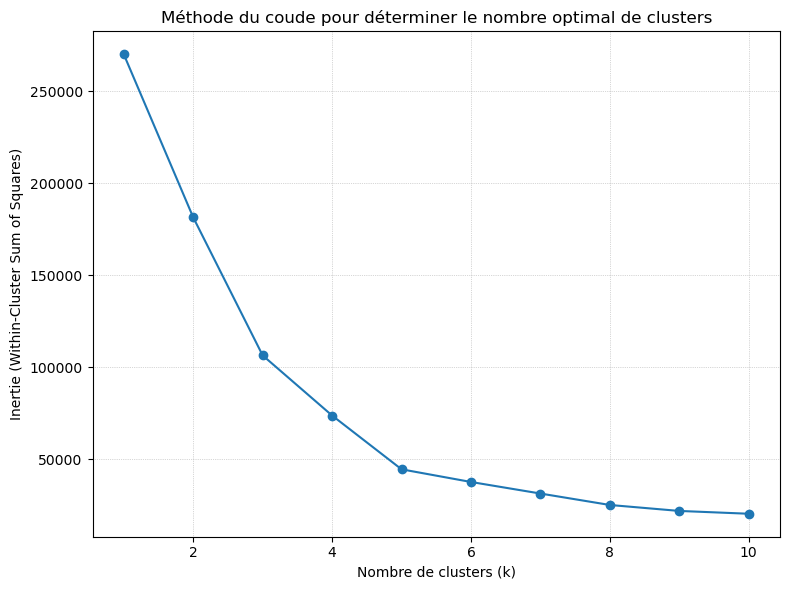

In [25]:
# Affichage du graphique
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (Within-Cluster Sum of Squares)")
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

In [26]:
# Entrainement du modèle KMeans avec k=5
nwkmeans = KMeans(n_clusters=5, init="random", random_state=42)
nwkmeans.fit(X)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=5, random_state=42)

In [28]:
# Récupération des étiquettes prédites pour chaque client
labels = nwkmeans.labels_

In [37]:
# Ajout de ces étiquettes comme nouvelle colonne 'Cluster' dans le DataFrame
new_mall_data['Cluster'] = labels

In [38]:
new_mall_data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,clusters,Cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,0,0


In [40]:
# effectifs par cluster
new_mall_data['Cluster'].value_counts()

Cluster
4    81
3    39
2    35
0    23
1    22
Name: count, dtype: int64

In [41]:
# moyenne du revenu et du score des dépenses
analyse_clusters = new_mall_data.groupby("Cluster")[["AnnualIncome", "SpendingScore"]].mean()
print("Moyenne du revenu et du score de dépense par cluster :")
print(analyse_clusters)

Moyenne du revenu et du score de dépense par cluster :
         AnnualIncome  SpendingScore
Cluster                             
0           26.304348      20.913043
1           25.727273      79.363636
2           88.200000      17.114286
3           86.538462      82.128205
4           55.296296      49.518519


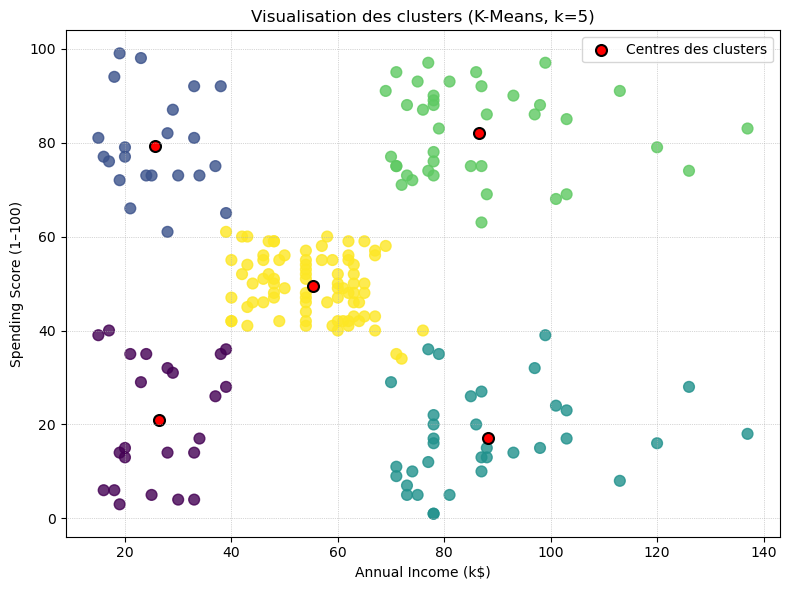

In [43]:
# Visualisation des clusters sur le plan (AnnualIncome, SpendingScore)
# Récupération des centres de clusters
centroids = nwkmeans.cluster_centers_

# Tracé du nuage de points coloré par cluster
plt.figure(figsize=(8,6))
plt.scatter(
    new_mall_data["AnnualIncome"], new_mall_data["SpendingScore"],
    c=new_mall_data["Cluster"],        # Couleur selon le cluster
    cmap="viridis",         # Palette de couleurs
    s=60, alpha=0.8
)

# Tracé des centres de clusters (en rouge avec croix)
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=250, c='red', marker='.', edgecolors='black', linewidths=1.5,
    label='Centres des clusters'
)

plt.title("Visualisation des clusters (K-Means, k=5)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()